In [1]:
import pandas as pd
from statsImport import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV, cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from itertools import combinations

sns.set_style('whitegrid')

bee_names = {
    'A1': 'African 1', 
    'A2': 'African 2', 
    'A3': 'African 3',
    'NA1': 'North American 1',
    'NA2': 'North American 2',
    'NA3': 'North American 3'
}

(24944, 7)


,ID,chr,start,end,GC,SNP,diversity
0,A1,1.1,1,50000,33.9707,163,0.00326
1,A1,1.1,50001,100000,39.1228,95,0.00190
2,A1,1.1,100001,150000,36.0667,100,0.00200
3,A1,1.1,150001,200000,38.1468,123,0.00246
4,A1,1.1,200001,250000,35.5467,53,0.00106


,chr,start,end,GC,SNP,diversity
ID,,,,,,
A1,4145,4145,4145,4145,4145,4145
A2,4200,4200,4200,4200,4200,4200
A3,4107,4107,4107,4107,4107,4107
NA1,4126,4126,4126,4126,4126,4126
NA2,4195,4195,4195,4195,4195,4195
NA3,4171,4171,4171,4171,4171,4171


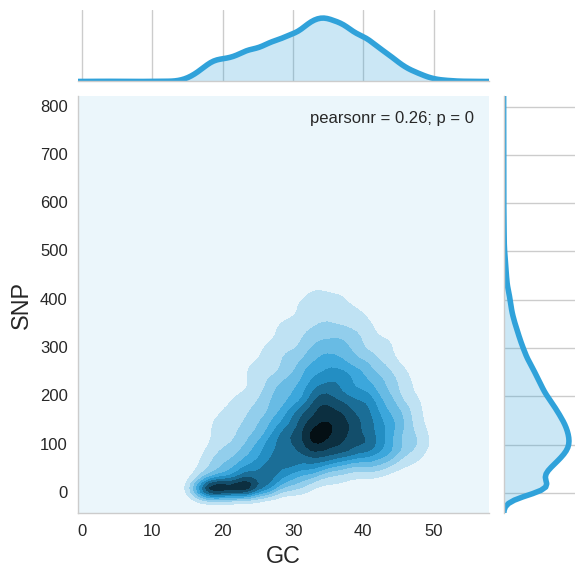

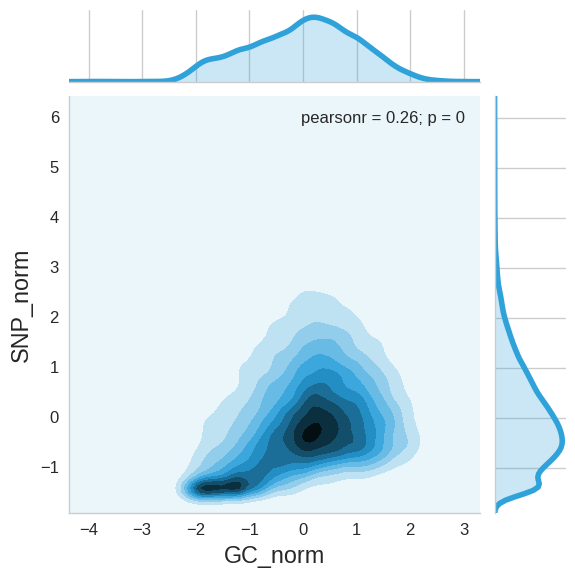

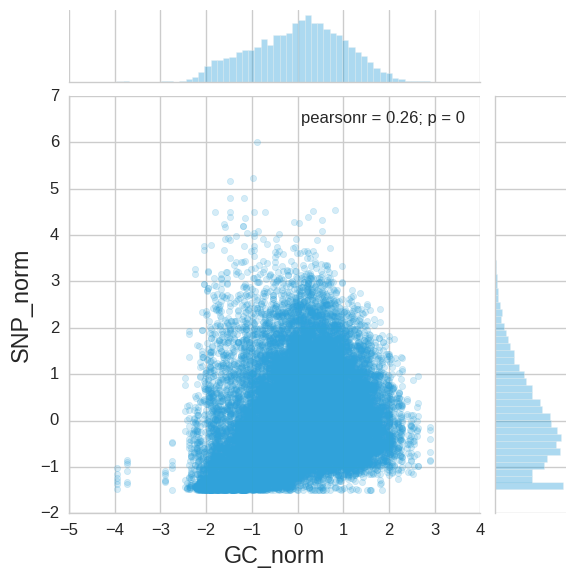

In [2]:
data = pd.read_csv('data/bee-data.csv', delimiter='\t', dtype={1: object})
data.columns = ['ID', 'chr', 'start', 'end', 'GC', 'SNP', 'diversity']
print(data.shape)
display(data.head())
display(data.groupby('ID').count())

bee = data

sns.jointplot(bee.GC, bee.SNP, kind='kde')
graph.show()

bee['GC_norm'] = (bee.GC - bee.GC.mean()) / bee.GC.std()
bee['SNP_norm'] = (bee.SNP - bee.SNP.mean()) / bee.SNP.std()

sns.jointplot(bee.GC_norm, bee.SNP_norm, kind='kde')
sns.jointplot(bee.GC_norm, bee.SNP_norm, alpha=0.2)
graph.show()

In [3]:
means = KMeans(n_clusters=2, n_jobs=-1).fit(bee[['GC_norm', 'SNP_norm']].values)

In [4]:
print(np.unique(means.labels_))
print(means.cluster_centers_)

for label in np.unique(means.labels_):
    graph.scatter(bee.GC_norm[scan.labels_ == label], bee.SNP_norm[scan.labels_ == label])
    graph.ylim([-2, 6])
    graph.xlim([-4, 4])
    graph.show()

[0 1]
[[ 0.57229973  0.4560065 ]
 [-0.91426118 -0.72848024]]


NameError: name 'scan' is not defined

In [5]:
individuals = data.ID.unique().tolist()

america = individuals[-3:]
africa = individuals[:3]

print('Individuals', individuals, 'america', america, 'africa', africa)

Individuals ['A1', 'A2', 'A3', 'NA1', 'NA2', 'NA3'] america ['NA1', 'NA2', 'NA3'] africa ['A1', 'A2', 'A3']


In [6]:
data['cont'] = data['ID'].copy()
data['cont'].replace(america, 'america', inplace=True)
data['cont'].replace(africa, 'africa', inplace=True)

display(data.head())

,ID,chr,start,end,GC,SNP,diversity,GC_norm,SNP_norm,cont
0,A1,1.1,1,50000,33.9707,163,0.00326,0.169679,0.073948,africa
1,A1,1.1,50001,100000,39.1228,95,0.00190,0.845345,-0.582252,africa
2,A1,1.1,100001,150000,36.0667,100,0.00200,0.444556,-0.534002,africa
3,A1,1.1,150001,200000,38.1468,123,0.00246,0.717349,-0.312052,africa
4,A1,1.1,200001,250000,35.5467,53,0.00106,0.376362,-0.987552,africa


,chr,start,A1,A2,A3,NA1,NA2,NA3
0,1.1,1,163,200,346,143,75,251
1,1.1,50001,95,234,254,119,243,192
2,1.1,100001,100,190,236,66,193,253
3,1.1,150001,123,202,231,172,134,336
4,1.1,200001,53,163,253,231,200,99


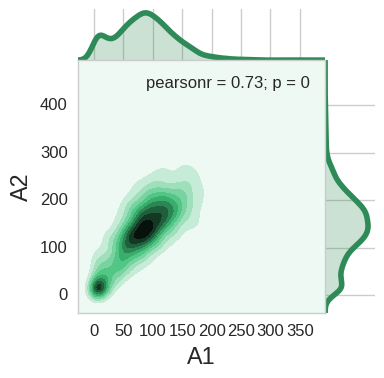

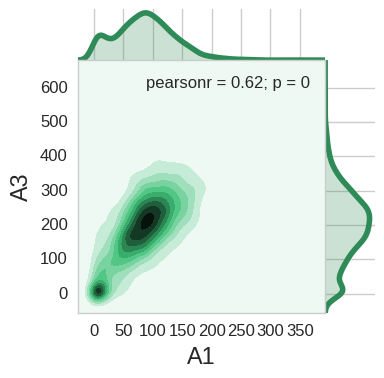

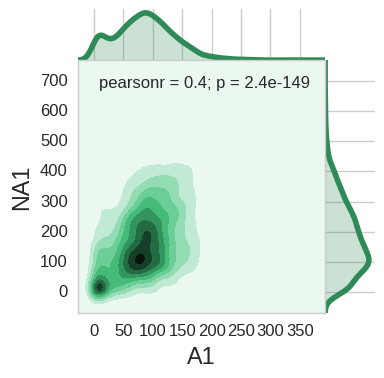

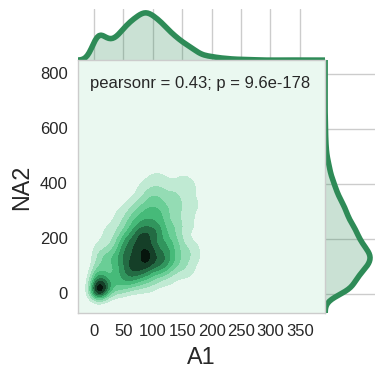

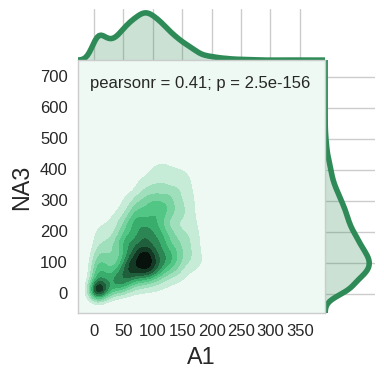

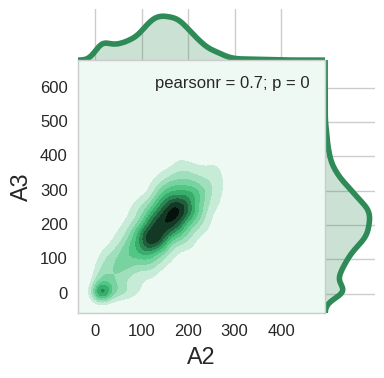

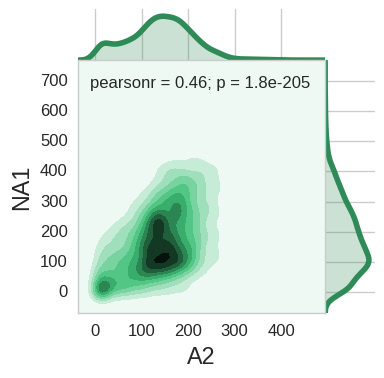

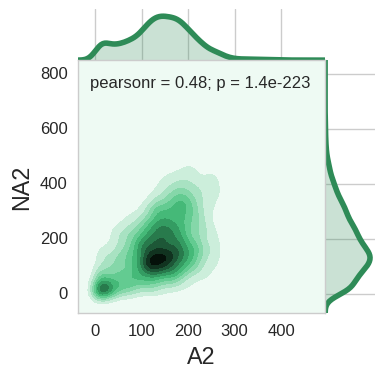

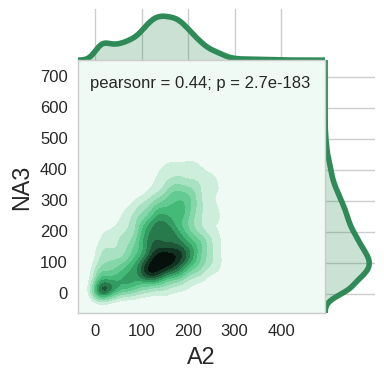

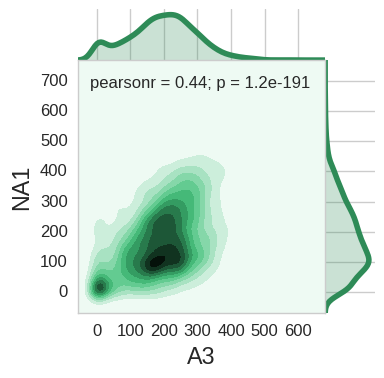

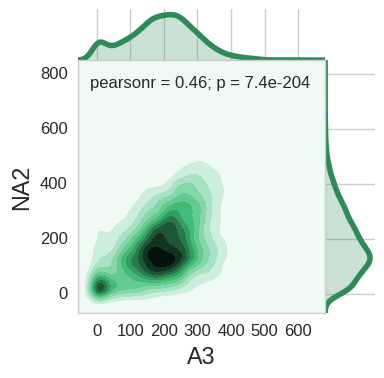

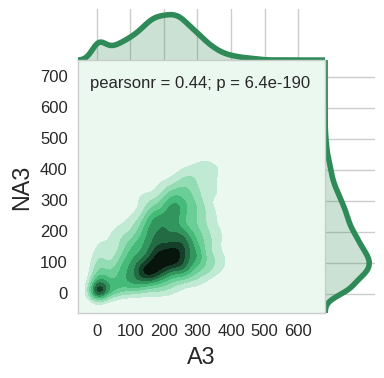

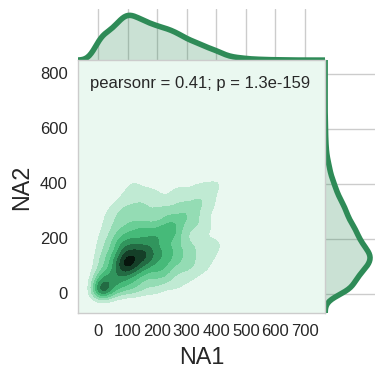

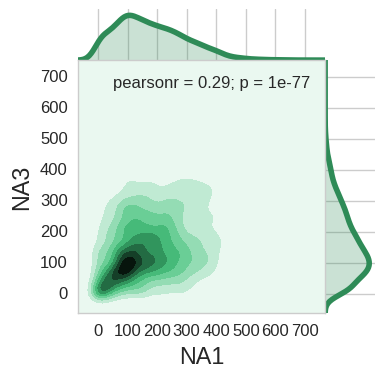

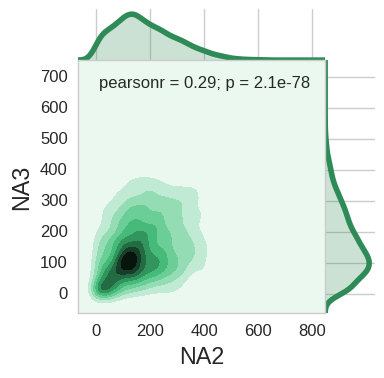

In [7]:
var = 'SNP'
sel = ['chr', 'start', var]

bees = data.groupby('ID')

snp_data = bees.get_group(individuals[0])[sel].copy()
snp_data.rename(columns={'SNP': individuals[0]})

for ind in individuals[1:]:
    snp_data = snp_data.merge(
        bees.get_group(ind)[sel], on=['chr', 'start']
    )
    snp_data.rename(columns={var: ind}, inplace=True)
    
snp_data.rename(columns={'{}_x'.format(var): individuals[0], '{}_y'.format(var): individuals[1]}, inplace=True)
display(snp_data.head())

snp_data.to_csv('snp_data.csv')

for x, y in combinations(individuals, 2):
    sns.jointplot(
        snp_data[x], snp_data[y], 
        kind='kde', space=0,
        color='seagreen', size=4
    )
    graph.show()

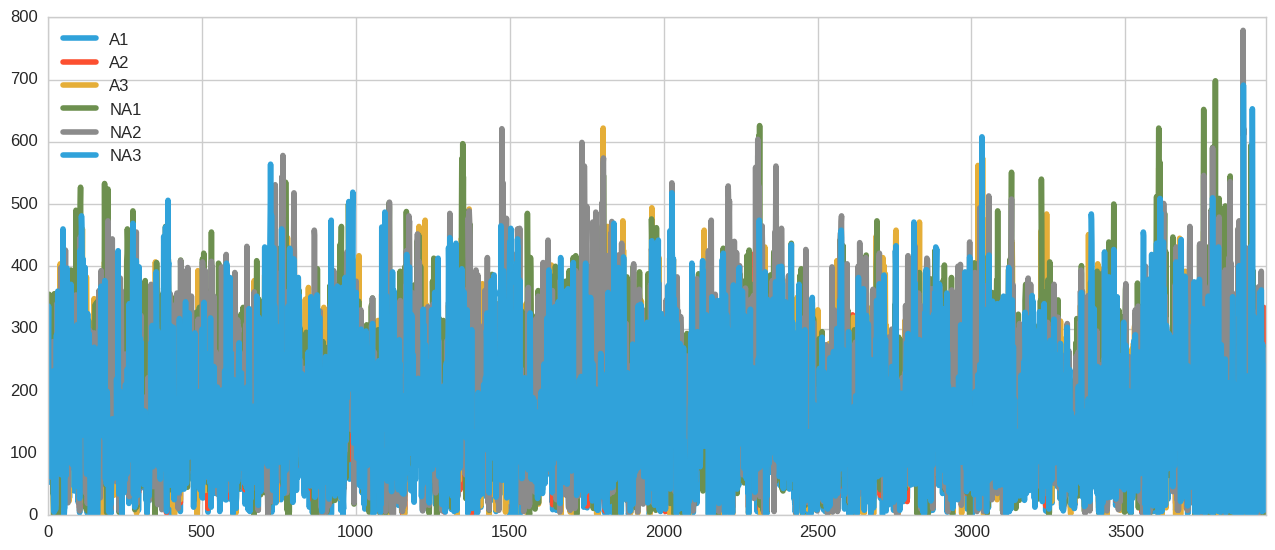

In [8]:
snp_data[snp_data.columns[2:]].plot(figsize=(14, 6))
graph.show()

,A1,A2,A3,NA1,NA2,NA3
0,163,200,346,143,75,251
1,95,234,254,119,243,192
2,100,190,236,66,193,253
3,123,202,231,172,134,336
4,53,163,253,231,200,99


,0,1,2,3,4,5,6,7,8,9,...,3946,3947,3948,3949,3950,3951,3952,3953,3954,3955
A1,163,95,100,123,53,148,84,75,70,95,...,42,4,5,140,4,3,173,5,28,62
A2,200,234,190,202,163,201,85,167,116,222,...,79,54,21,334,55,20,251,9,49,120
A3,346,254,236,231,253,337,125,218,105,253,...,42,2,3,77,1,2,74,14,19,80
NA1,143,119,66,172,231,355,127,309,204,270,...,273,178,86,68,7,4,96,70,81,118
NA2,75,243,193,134,200,92,61,93,116,156,...,38,230,267,98,55,58,111,58,97,142
NA3,251,192,253,336,99,179,124,166,62,160,...,225,81,42,69,8,10,112,62,99,239


(6, 6)


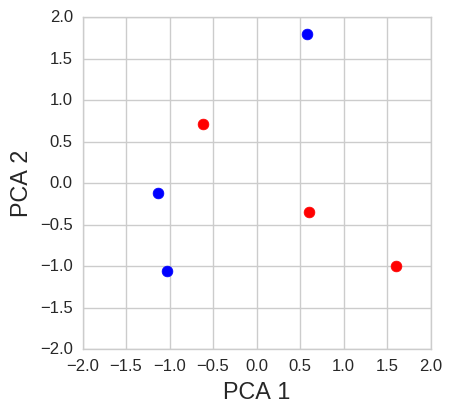

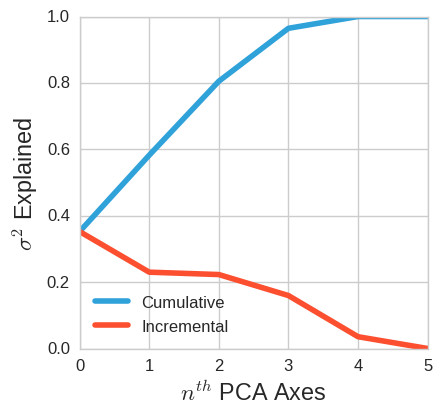

PCA Var: [ 0.35232195  0.58223497  0.80498679  0.96447313  1.          1.        ]


In [17]:
#### Convert by position data to by bee data
bee_data = snp_data.copy()
bee_data.drop(['chr', 'start'], axis='columns', inplace=True)

display(bee_data.head())

bee_data = bee_data.T
display(bee_data)

# PCA 
pca = PCA(whiten=True)
x_pca = pca.fit_transform(bee_data.values)
print(x_pca.shape)

graph.figure(figsize=(4, 4))
graph.scatter(x_pca[:3, 0], x_pca[:3, 1], color='red', s=60)
graph.scatter(x_pca[3:, 0], x_pca[3:, 1], color='blue', s=60)
graph.xlabel('PCA 1')
graph.xlim([-2, 2])
graph.ylabel('PCA 2')
graph.ylim([-2, 2])
graph.show()

graph.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative')
graph.plot(pca.explained_variance_ratio_, label='Incremental')
graph.ylabel('$\sigma^2$ Explained')
graph.xlabel('$n^{th}$ PCA Axes')
graph.legend(loc=0)
graph.show()

print('PCA Var:', np.cumsum(pca.explained_variance_ratio_))

# Decision Trees vs Logistic Regressions

Which model best predicts where a bee is African vs North American

In [23]:
# Training Data
display(bee_data)
x = bee_data.values
# x = x_pca[:, :4]
y = ['Africa']*3 + ['America']*3
y = LabelBinarizer().fit_transform(np.array(y))

print(x.shape, y.shape)
print(x, y)

,0,1,2,3,4,5,6,7,8,9,...,3946,3947,3948,3949,3950,3951,3952,3953,3954,3955
A1,163,95,100,123,53,148,84,75,70,95,...,42,4,5,140,4,3,173,5,28,62
A2,200,234,190,202,163,201,85,167,116,222,...,79,54,21,334,55,20,251,9,49,120
A3,346,254,236,231,253,337,125,218,105,253,...,42,2,3,77,1,2,74,14,19,80
NA1,143,119,66,172,231,355,127,309,204,270,...,273,178,86,68,7,4,96,70,81,118
NA2,75,243,193,134,200,92,61,93,116,156,...,38,230,267,98,55,58,111,58,97,142
NA3,251,192,253,336,99,179,124,166,62,160,...,225,81,42,69,8,10,112,62,99,239


(6, 3956) (6, 1)
[[163  95 100 ...,   5  28  62]
 [200 234 190 ...,   9  49 120]
 [346 254 236 ...,  14  19  80]
 [143 119  66 ...,  70  81 118]
 [ 75 243 193 ...,  58  97 142]
 [251 192 253 ...,  62  99 239]] [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


0.5 +/- 0.0


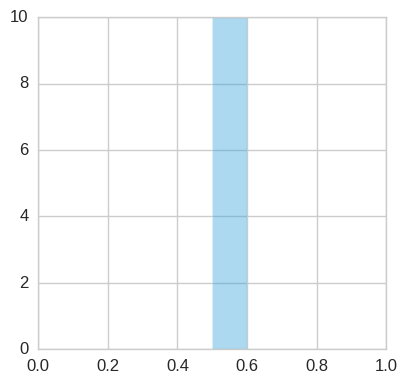

In [25]:
# Logistic Regression
logit = LogisticRegression()

cv_scores = []
for _ in tqdm(range(100)):
    scores = cross_val_score(logit, x, y, cv=LeaveOneOut(), n_jobs=-1)
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores)
print(cv_scores.mean(), '+/-', cv_scores.std()*2)

sns.distplot(cv_scores, kde=False, norm_hist=True)
graph.show()

100%|██████████| 1000/1000 [03:11<00:00,  5.26it/s]


0.7175 +/- 0.174475404188


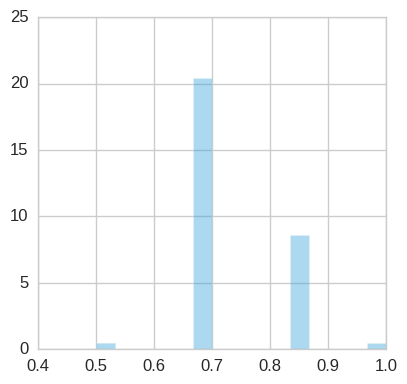

In [21]:
# Decision Trees
tree = DecisionTreeClassifier()
# tree.fit(x, y)
# print(tree.score(x, y))

cv_scores = []
for _ in tqdm(range(1000)):
    scores = cross_val_score(tree, x, y, cv=LeaveOneOut(), n_jobs=-1)
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores)
print(cv_scores.mean(), '+/-', cv_scores.std()*2)

sns.distplot(cv_scores, kde=False, norm_hist=True)
graph.show()